# **Analysis of Sovereign Gold Bonds**

Sovereign Gold Bonds or SGBs are government securities denominated in grams of gold. They are substitutes for holding physical gold. Investors have to pay the issue price in cash and the bonds will be redeemed in cash on maturity.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_excel('https://rbidocs.rbi.org.in/rdocs/Content/DOCs/SOVERIGNGOLDBONDS.xlsx',index_col=0)

df.columns=df.iloc[1]

#slicing lastbutone row since grand totals not necessary
df=df.iloc[2:-1,1:]
df


nan,Tranche,ISIN,Issue Date,Issue price/unit,Number of units subscribed (in grams),Number of units redeemed including premature redemption (in grams),Units outstanding (in grams)
NaN,2015-I,IN0020150085,"November 30, 2015",2684,913571,913571,0
NaN,2016-I,IN0020150101,"February 8, 2016",2600,2869973,2869973,0
NaN,2016-II,IN0020150119,"March 29, 2016",2916,1119741,1119741,0
NaN,2016-17 Series I,IN0020160027,"August 5, 2016",3119,2953025,202198,2750827
NaN,2016-17 Series II,IN0020160043,"September 30, 2016",3150,2615800,225322,2390478
...,...,...,...,...,...,...,...
NaN,"2022-23, Series IV",IN0020220169,"March 14, 2023",5611,3531586,NaN,3531586
NaN,"2023-24, Series I",IN0020230069,"June 27, 2023",5926,7769290,NaN,7769290
NaN,"2023-24, Series II",IN0020230093,"September 20, 2023",5923,11673960,NaN,11673960
NaN,"2023-24, Series III",IN0020230168,"December 28, 2023",6199,12106807,NaN,12106807


#*Function to convert Issue date to Financial Year*


In [ ]:
def fis_year(df):
  df['Issue Date'] = pd.to_datetime(df['Issue Date'])

  df['fiscal_year'] = df['Issue Date'].dt.year.where(df['Issue Date'].dt.month<=3, df['Issue Date'].dt.year+1)
  df['fiscal_year'] = df['fiscal_year'].apply(lambda x: f"{x-1}-{str(x)[-2:]}")
  df['Issue Date']=df['Issue Date'].dt.strftime('%d-%m-%Y')

  return df

print(fis_year(df))

nan              Tranche         ISIN   Issue Date Issue price/unit  \
NaN               2015-I  IN0020150085  30-11-2015             2684   
NaN               2016-I  IN0020150101  08-02-2016             2600   
NaN              2016-II  IN0020150119  29-03-2016             2916   
NaN     2016-17 Series I  IN0020160027  05-08-2016             3119   
NaN    2016-17 Series II  IN0020160043  30-09-2016             3150   
..                   ...           ...         ...              ...   
NaN   2022-23, Series IV  IN0020220169  14-03-2023             5611   
NaN    2023-24, Series I  IN0020230069  27-06-2023             5926   
NaN   2023-24, Series II  IN0020230093  20-09-2023             5923   
NaN  2023-24, Series III  IN0020230168  28-12-2023             6199   
NaN   2023-24, Series IV  IN0020230184  21-02-2024             6263   

nan Number of units subscribed (in grams)   \
NaN                                 913571   
NaN                                2869973   
NaN      

#*Function to standardize dataset*

In [ ]:

def standardize(df):

  df = pd.melt(df,id_vars=['fiscal_year', 'Issue Date', 'Tranche', 'ISIN '],
               value_vars=['Issue price/unit', 'Number of units subscribed (in grams) ','Number of units redeemed including premature redemption (in grams)','Units outstanding (in grams) '],
               var_name='category') #melting ie; you are changing format to fewer columns

  df = df.rename(columns={'Issue Date': 'issue_date', 'Tranche': 'tranche', 'category': 'category', 'value': 'value'}) #renaming columns

  df["tranche"] = df["tranche"].replace({"2015-I": "Series I", "2016-I": "Series II", "2016-II": "Series II"})##why only some replace and not all

  df["tranche"] = df["tranche"].replace(regex='\d{4}-\d{2},*',value="")

  df["category"] = df["category"].replace({"Issue price/unit": "Issue Price per Unit", "Number of units subscribed (in grams) ": "Units Subscribed in Grams", "Number of units redeemed including premature redemption (in grams)": "Premature redemption of units", "Units outstanding (in grams) ": "Outstanding Units"}) #standardizing content

  df['units'] = df['category'].apply(lambda x: 'value in rupees' if x == 'Issue Price per Unit' else 'value in grams') #assigning units

  df = df.applymap(lambda x: x.strip() if isinstance (x,str) else x)

  change_column = ['fiscal_year', 'issue_date', 'tranche', 'category', 'value', 'units']

  df = df.reindex(columns=change_column)

  return df

df=standardize(df)

print(df)




    fiscal_year  issue_date     tranche              category       value  \
0       2015-16  30-11-2015    Series I  Issue Price per Unit      2684.0   
1       2015-16  08-02-2016   Series II  Issue Price per Unit      2600.0   
2       2015-16  29-03-2016   Series II  Issue Price per Unit      2916.0   
3       2016-17  05-08-2016    Series I  Issue Price per Unit      3119.0   
4       2016-17  30-09-2016   Series II  Issue Price per Unit      3150.0   
..          ...         ...         ...                   ...         ...   
263     2022-23  14-03-2023   Series IV     Outstanding Units   3531586.0   
264     2023-24  27-06-2023    Series I     Outstanding Units   7769290.0   
265     2023-24  20-09-2023   Series II     Outstanding Units  11673960.0   
266     2023-24  28-12-2023  Series III     Outstanding Units  12106807.0   
267     2023-24  21-02-2024   Series IV     Outstanding Units  12785721.0   

               units  
0    value in rupees  
1    value in rupees  
2    v

<ipython-input-3-dfb35df852b9>:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance (x,str) else x)


# *Function to sort data to get in final desired format*

In [ ]:
def sort_fun(df):
  df['issue_date'] = pd.to_datetime(df['issue_date'], format='%d-%m-%Y', errors='coerce')
  df=df.sort_values(by=['issue_date'], ascending=False)
  return df

df=sort_fun(df)
print(df)

    fiscal_year issue_date     tranche                       category  \
267     2023-24 2024-02-21   Series IV              Outstanding Units   
200     2023-24 2024-02-21   Series IV  Premature redemption of units   
133     2023-24 2024-02-21   Series IV      Units Subscribed in Grams   
66      2023-24 2024-02-21   Series IV           Issue Price per Unit   
65      2023-24 2023-12-28  Series III           Issue Price per Unit   
..          ...        ...         ...                            ...   
202     2015-16 2016-02-08   Series II              Outstanding Units   
0       2015-16 2015-11-30    Series I           Issue Price per Unit   
201     2015-16 2015-11-30    Series I              Outstanding Units   
67      2015-16 2015-11-30    Series I      Units Subscribed in Grams   
134     2015-16 2015-11-30    Series I  Premature redemption of units   

          value            units  
267  12785721.0   value in grams  
200         NaN   value in grams  
133  12785721.0   

## **Trend of subscriptions since inception**

SGBs can be purchased online through demat accounts, net banking, or the RBI's designated website. They can also be purchased offline by visiting authorized financial institutions, such as banks and designated post offices.

Below, we plot the trend in SGB subscriptions since the inception of the scheme in November 2015. The units subscribed is given in grams.

In [ ]:
# plt.figure(figsize=(10, 10))

# df.sort_values(by='issue_date', ascending = True, inplace =  True)

# plt.plot(df[df['category'] == 'Units Subscribed in Grams']['issue_date'], df[df['category'] == 'Units Subscribed in Grams']['category'], marker='o', linestyle='-', color='y')
# plt.title('Tranche wise Trends in Units Subscribed (in Grams)')
# plt.xlabel('Issue Date')
# plt.ylabel('Value (in Crores)')
# plt.grid(True)
# plt.xticks(rotation=45)


#*Created Line Graph*

<ipython-input-10-2763ca14e71f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  units_subscribed_df.sort_values(by='issue_date', ascending=True, inplace=True)


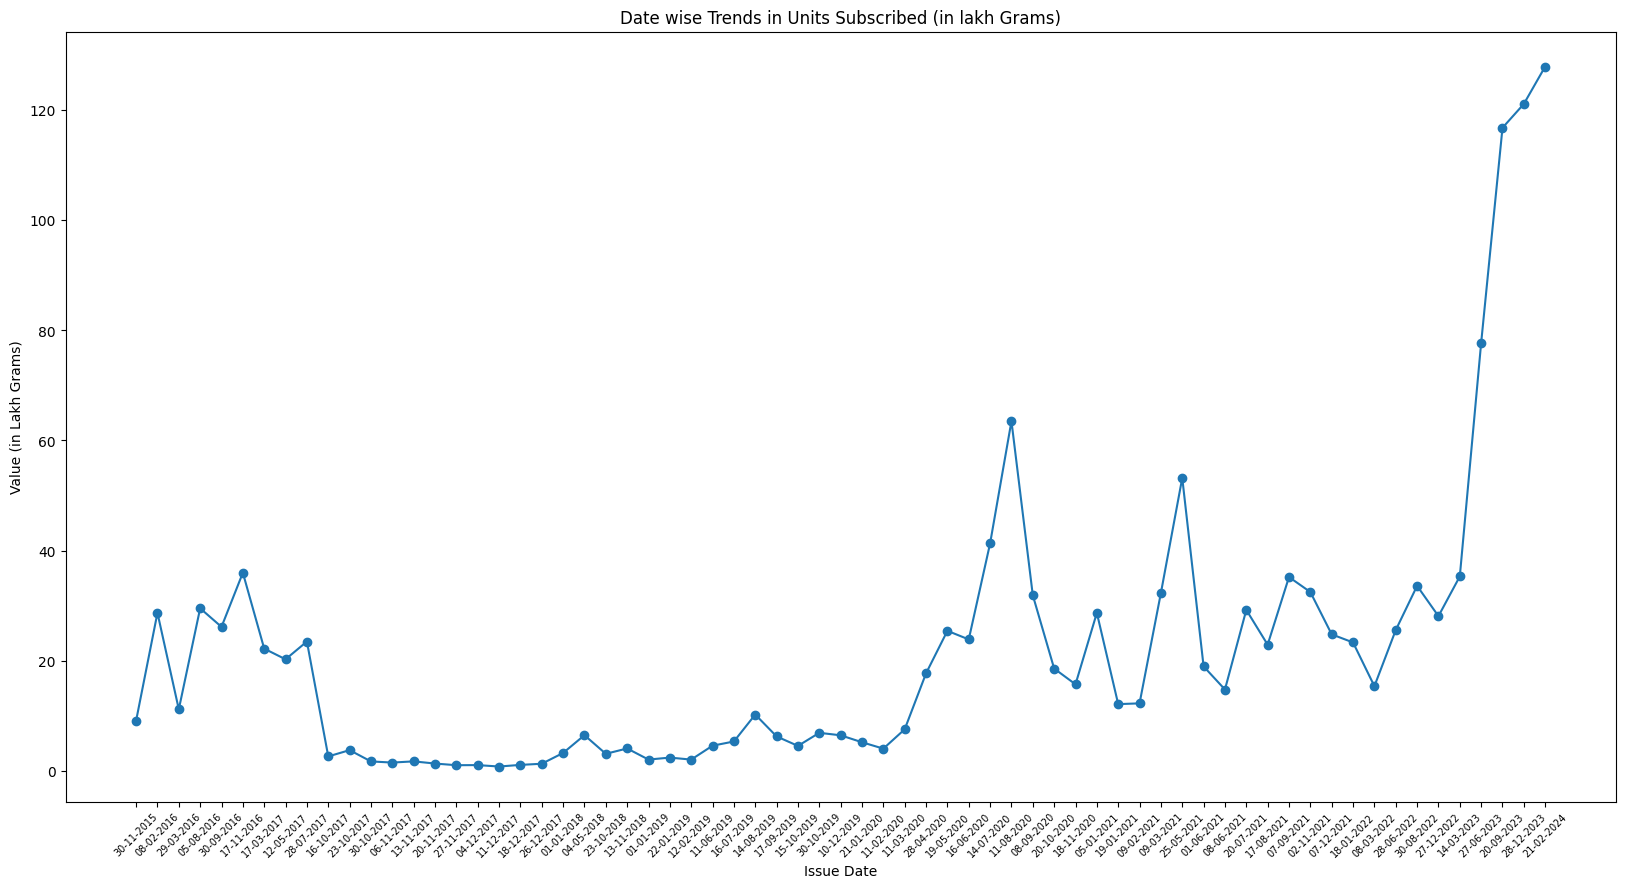

In [ ]:

plt.figure(figsize=(20, 10))

units_subscribed_df = df[df['category'] == 'Units Subscribed in Grams']
units_subscribed_df.sort_values(by='issue_date', ascending=True, inplace=True)


plt.title('Date wise Trends in Units Subscribed (in lakh Grams)')
plt.xlabel('Issue Date')
plt.ylabel('Value (in Lakh Grams)')

# line chart
plt.plot(units_subscribed_df['issue_date'].dt.strftime('%d-%m-%Y'), units_subscribed_df['value'] / 100000, marker='o')

plt.xticks(rotation=45,fontsize=7)

plt.show()

It can be seen that in the first three issues of 2017-18, the subscriptions were round about the same levels as in 2016-17. However, since then there was a sharp decline in the number of units subscribed until 2019-20. In the beginning of 2020-21, the subscriptions recovered and since then new record number of subscriptions were recorded each year. As of 28 July 2024, the highest subscriptions were recorded in the last three tranches of 2023-24 with an average of 1.2 crore units subscribed in each tranche.

## **Trend in Units Redeemed including Premature Redemption**

SGBs are issued for a tenure of eight years but one can redeem these gold bonds prematurely after five years. RBI determines the premature redemption price based on the average closing price of 999 purity gold over the three business days before the redemption date.

In [ ]:
# filtered_df = df[df['Number of units redeemed including premature redemption (in grams)'] != 0]
# filtered_df['Number of units redeemed including premature redemption (in grams)'] = filtered_df['Number of units redeemed including premature redemption (in grams)'] / 100000
# filtered_df.sort_values(by='Issue Date', ascending=True, inplace=True)
# plt.figure(figsize=(20, 6))
# plt.bar(filtered_df['Issue Date'].dt.strftime('%d-%m-%Y'),
#         filtered_df['Number of units redeemed including premature redemption (in grams)'],
#         color='brown',
#         width=10)
# plt.title('Trends in Units Redeemed Including Premature Redemption (in Grams)')
# plt.xlabel('Issue Date')
# plt.ylabel('Value (in Lakhs)')
# plt.xticks(rotation=45, ha='right')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

# *Plotted bar graph*

<ipython-input-12-9acf8e3b68fa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  premature_redemption_df.sort_values(by='issue_date', ascending=True, inplace=True)


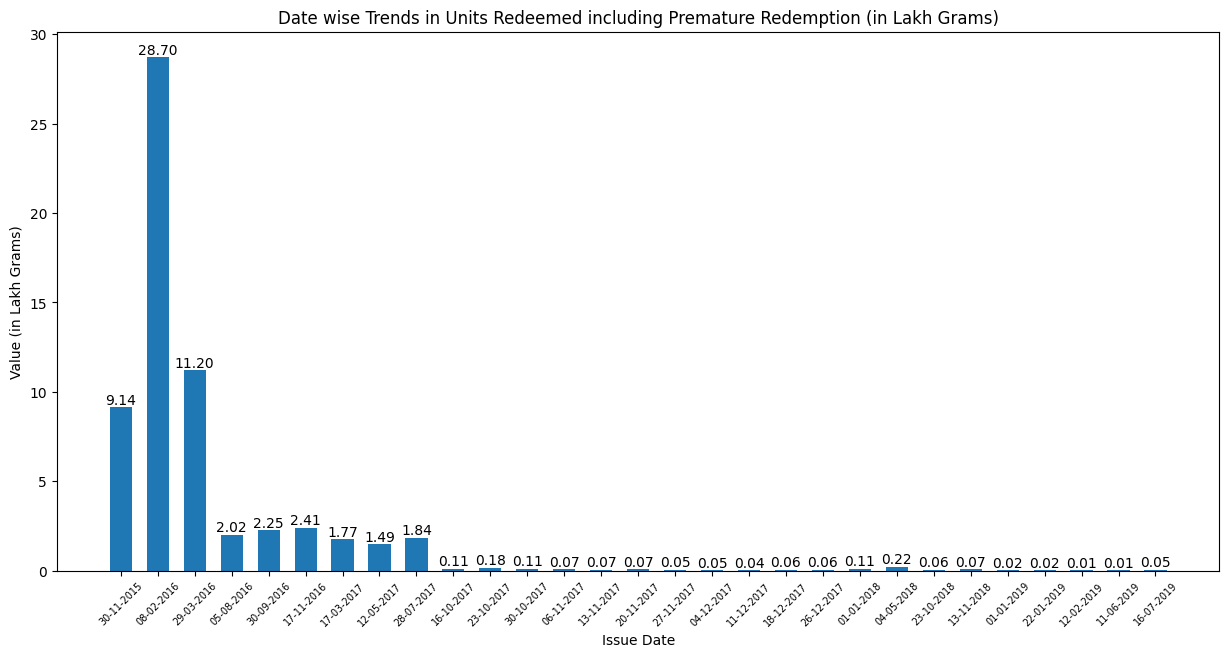

In [ ]:

plt.figure(figsize=(15, 7))

# Filter the DataFrame and ignore null values
premature_redemption_df = df[(df['category'] == 'Premature redemption of units') & (df['value'].notnull())]
premature_redemption_df.sort_values(by='issue_date', ascending=True, inplace=True)

plt.title('Date wise Trends in Units Redeemed including Premature Redemption (in Lakh Grams)')
plt.xlabel('Issue Date')
plt.ylabel('Value (in Lakh Grams)')


bars = plt.bar(premature_redemption_df['issue_date'].dt.strftime('%d-%m-%Y'), premature_redemption_df['value'] / 100000, width=0.6)

plt.xticks(rotation=45, fontsize=7)

plt.bar_label(bars, fmt='%.2f')
plt.show()


On comparing the number of units redeemed in each tranche with the number of units subscribed, it is seen that 100% of the units subscribed in the first three tranches have been redeemed since these matured in 2023-24. Excluding these, a total of 13.1 lakh units have been redeemed under the scheme out of the total 14.2 crore units subscribed in this period (since 2016-17). This implies that, about 0.92% of the units have been redeemed prematurely. If we consider only those units which are eligible for premature redemption, then about 6.25% of the units have been redeemed before maturation.


In the recent Union Budget, the Government of India announced its decision to reduce customs duties on gold and silver from 15% to 6%, which is expected to reduce the demand for SGBs. Its prices in NSE also dropped following the announcement. There are also reports that the government may eventually discontinue the scheme.